### 1.数据清洗

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# 读取CSV文件
df = pd.read_excel('豆瓣图书_分列.xlsx')

df['出版年月'] = pd.to_datetime(df['出版年月'], errors='coerce')

# 过滤掉无效的日期值（缺失值）
df = df.dropna(subset=['出版年月', '价格', 'score'])

# 提取年份和月份部分
df['出版年月'] = df['出版年月'].dt.to_period('M')

### 2.出版数量变化趋势

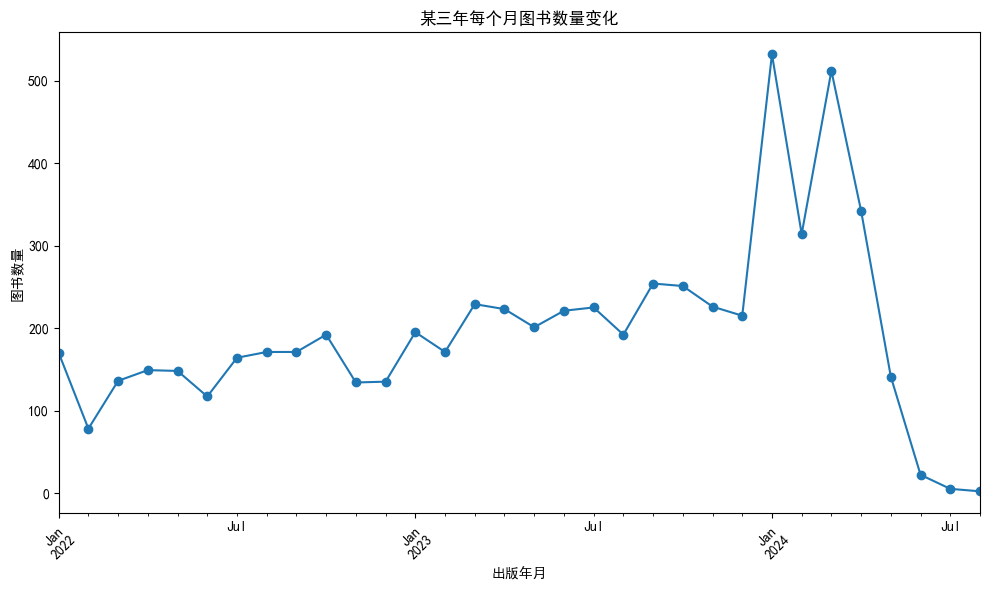

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体为SimHei或其他中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 只保留某三年的数据
start_year = pd.Period('2022')
end_year = pd.Period('2024')
df = df[(df['出版年月'].dt.year >= start_year.year) & (df['出版年月'].dt.year <= end_year.year)]

# 创建某三年的每个月图书数量的折线图
plt.figure(figsize=(10, 6))
monthly_counts = df['出版年月'].value_counts().sort_index()
monthly_counts.plot(kind='line', marker='o')
plt.xlabel('出版年月')
plt.ylabel('图书数量')
plt.title('某三年每个月图书数量变化')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.分类

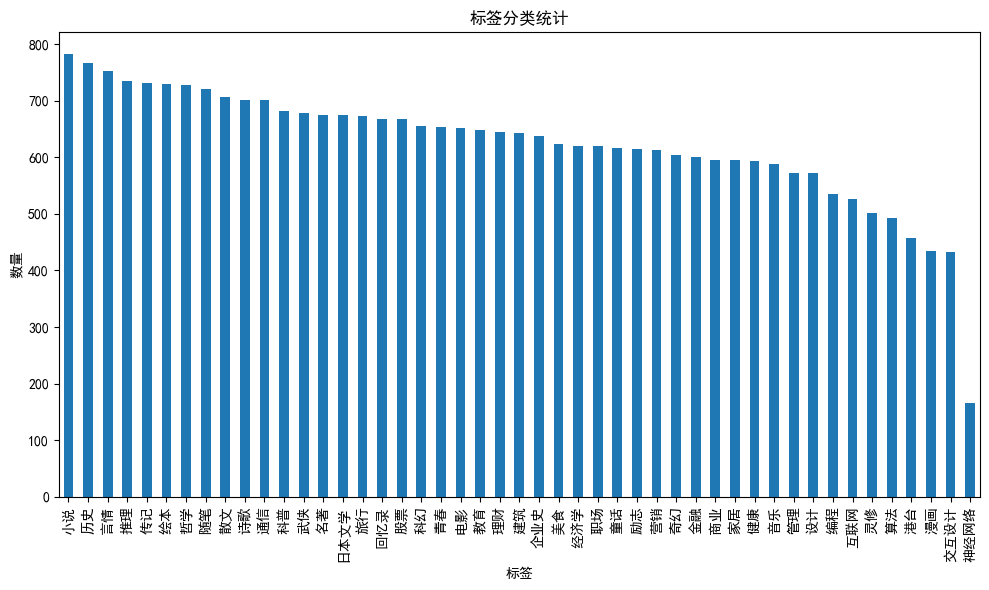

In [20]:
# 创建标签(label)的条形统计图
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar')
plt.xlabel('标签')
plt.ylabel('数量')
plt.title('标签分类统计')
plt.tight_layout()
plt.show()

### 4.价格与评分之间的关系

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6376\1230139226.py:7: UserWarning: Glyph 163 (\N{POUND SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6376\1230139226.py:7: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6376\1230139226.py:7: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 163 (\N{POUND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 165 (\N{YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canva

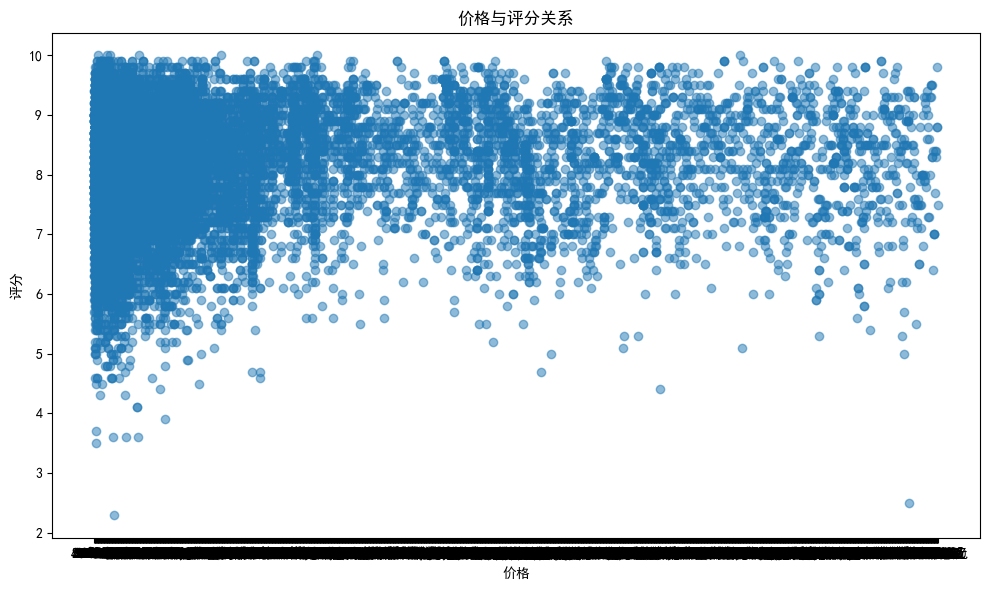

In [24]:
# 创建价格与评分之间的关系图
plt.figure(figsize=(10, 6))
plt.scatter(df['价格'], df['score'], alpha=0.5)
plt.xlabel('价格')
plt.ylabel('评分')
plt.title('价格与评分关系')
plt.tight_layout()
plt.show()

### 5.《我的阿勒泰》评论可视化

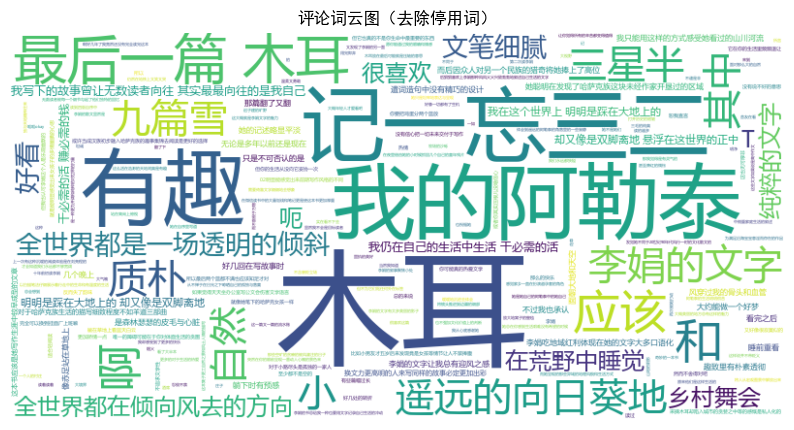

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter

# 加载停用词列表
def load_stopwords():
    stopwords = set()
    with open('stopwords.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stopwords.add(line.strip())
    return stopwords

stopwords = load_stopwords()

def tokenize(text):
    tokens = list(jieba.cut(text))
    # print(list(tokens))
    counter = Counter(tokens)
    filtered_tokens = [token for token in tokens if token not in stopwords and counter[token] < len(tokens) * 0.3]
    # filtered_tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(filtered_tokens)

# 读取CSV文件
df = pd.read_csv('我的阿勒泰短评.csv')

# 将所有评论合并成一个字符串，并过滤掉停用词
comments_text = ' '.join(df['comment'].dropna())
tokens = tokenize(comments_text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
filtered_text = ' '.join(filtered_tokens)

# 创建词云对象并生成词云图
wordcloud = WordCloud(width=800, height=400, font_path='msyh.ttc', background_color='white').generate(comments_text)

# 显示词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('评论词云图（去除停用词）')
plt.show()

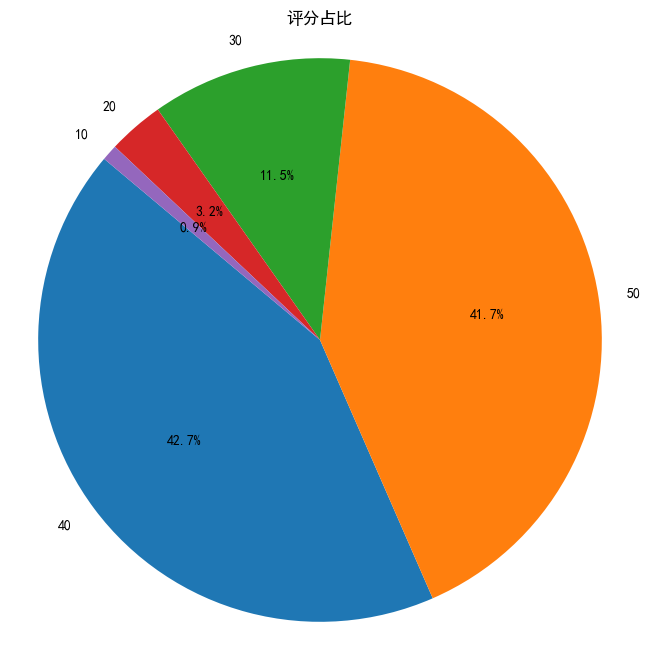

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 清洗score列
def clean_score(x):
    match = re.findall(r'\d+\.?\d*', str(x))
    if match:
        return match[0]
    else:
        return None

df['score'] = df['score'].apply(clean_score)
# 计算每个评分的数量
score_counts = df['score'].value_counts()

# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('评分占比')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()

### 6.《我与地坛》评论可视化

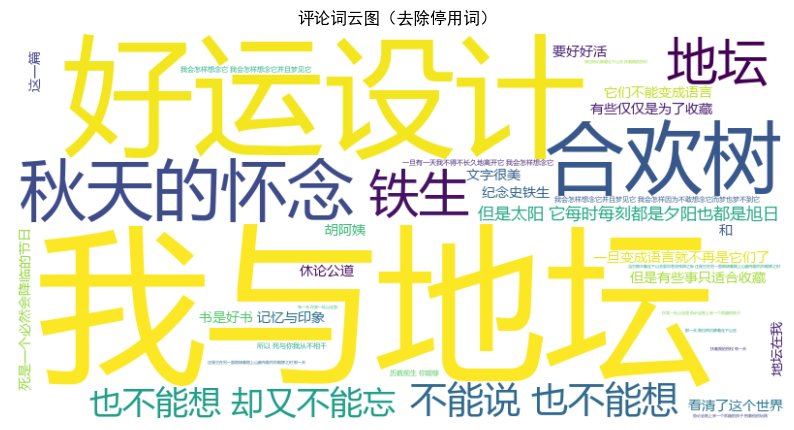

In [46]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter

# 加载停用词列表
def load_stopwords():
    stopwords = set()
    with open('stopwords.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stopwords.add(line.strip())
    return stopwords

stopwords = load_stopwords()

def tokenize(text):
    tokens = list(jieba.cut(text))
    # print(list(tokens))
    counter = Counter(tokens)
    filtered_tokens = [token for token in tokens if token not in stopwords and counter[token] < len(tokens) * 0.3]
    # filtered_tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(filtered_tokens)

# 读取CSV文件
df = pd.read_csv('我与地坛短评.csv')

# 将所有评论合并成一个字符串，并过滤掉停用词
comments_text = ' '.join(df['comment'].dropna())
tokens = tokenize(comments_text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords]
filtered_text = ' '.join(filtered_tokens)

# 创建词云对象并生成词云图
wordcloud = WordCloud(width=800, height=400, font_path='msyh.ttc', background_color='white').generate(comments_text)

# 显示词云图
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('评论词云图（去除停用词）')
plt.show()

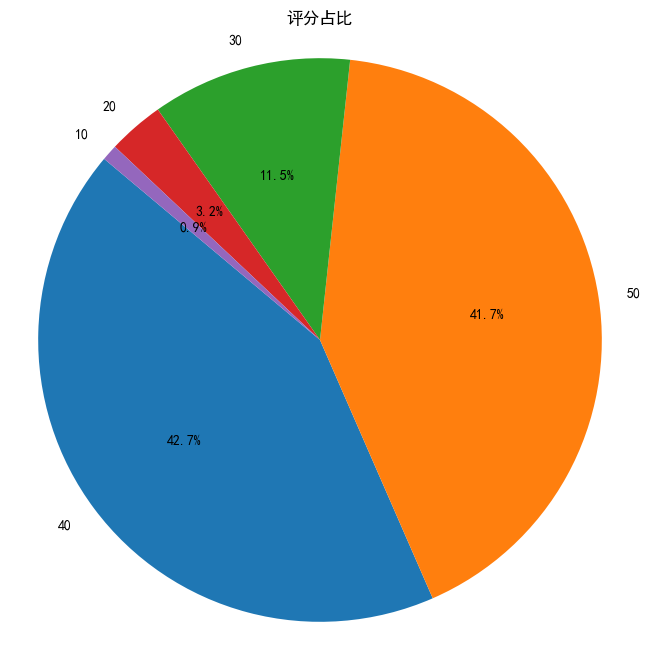

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 清洗score列
def clean_score(x):
    match = re.findall(r'\d+\.?\d*', str(x))
    if match:
        return match[0]
    else:
        return None

df['score'] = df['score'].apply(clean_score)
# 计算每个评分的数量
score_counts = df['score'].value_counts()

# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('评分占比')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()